In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# import the data
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
# Drop day, moth year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [23]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0,1)

In [26]:
print(df.head())
print(df['Classes'].value_counts())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0
Classes
1    137
0    106
Name: count, dtype: int64


In [27]:
## Indeprendent and dependent feautures
X = df.drop('FWI', axis=1)
y = df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [28]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [29]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [30]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [31]:
## Features Selection based on correlation
X_train.corr

<bound method DataFrame.corr of      Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  Classes  Region
97            29  74  19   0.1  75.8   3.6  32.2   2.1   5.6        0       0
141           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7        0       1
192           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4        1       1
68            32  60  18   0.3  77.1  11.3  47.0   2.2  14.1        0       0
119           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8        0       0
..           ...  ..  ..   ...   ...   ...   ...   ...   ...      ...     ...
106           24  82  15   0.4  44.9   0.9   7.3   0.2   1.4        0       0
14            28  80  17   3.1  49.4   3.0   7.4   0.4   3.0        0       0
92            25  76  17   7.2  46.0   1.3   7.5   0.2   1.8        0       0
179           34  59  16   0.0  88.1  19.5  47.2   7.4  19.5        1       1
102           30  77  21   1.8  58.5   1.9   8.4   1.1   2.4        0       0

[182 rows x 11 columns]>

In [32]:
import matplotlib as plt

<Axes: >

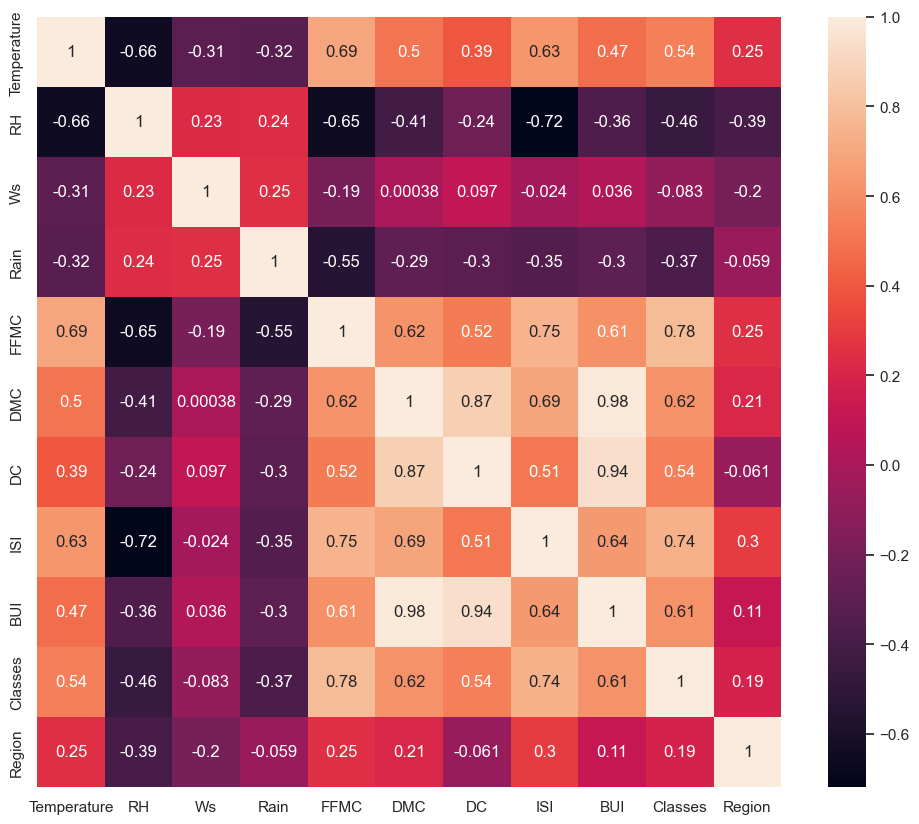

In [33]:
## Check for multicollinearity
# More size of the figure
sns.set(rc={'figure.figsize':(12,10)})
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [34]:
def correlation_funtion(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [37]:
corr_feature = correlation_funtion(X_train, 0.85)

In [38]:
## Drop highly correlated features
X_train.drop(corr_feature, axis=1, inplace=True)
X_test.drop(corr_feature, axis=1, inplace=True)

# See the shape after dropping correlated features
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [39]:
## Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)


In [40]:
X_train_scaler

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box Plots to understand effect of Standard Scaler

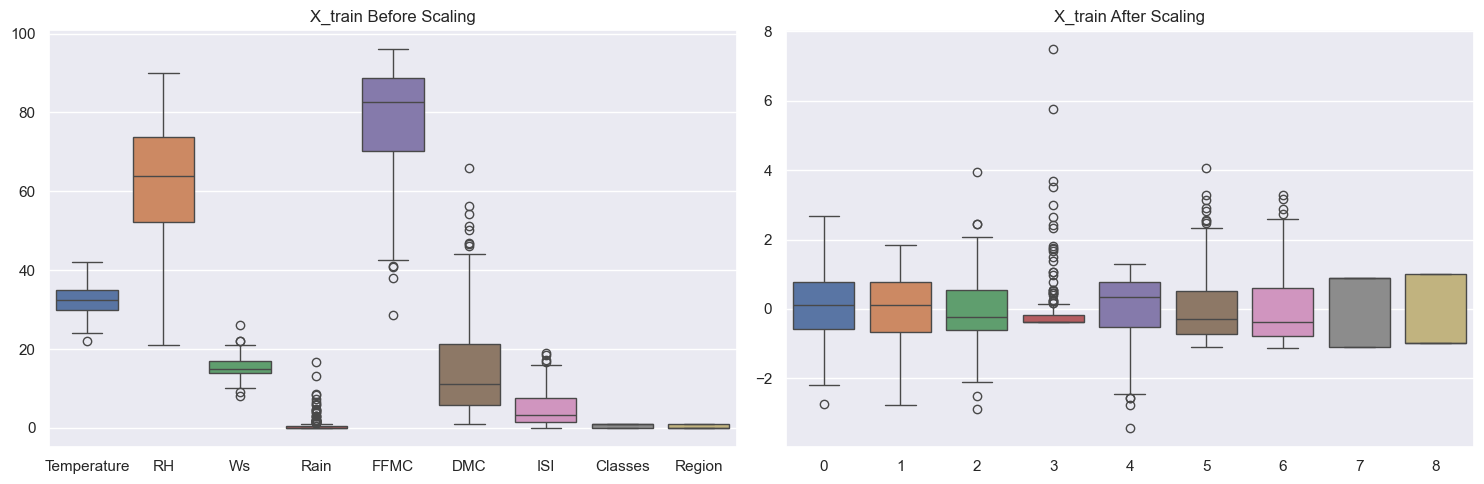

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("X_train Before Scaling")
sns.boxplot(data=X_train_scaler, ax=axes[1])
axes[1].set_title("X_train After Scaling")
plt.tight_layout()
plt.show()